In [1]:
import string
import sklearn
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
data = pd.read_csv('data/tweets_labelled_tokenized.csv', sep=',', encoding='utf-8')
data.head()

,tweet,polaritas,sentimen
0,"['jbharga', 'ayam', 'rm', 'tgk', 'telor', 'wya...",-2,Negatif
1,"['berdiri', 'di', 'atas', 'kaki', 'sendiri', '...",-2,Negatif
2,"['penyebab', 'harga', 'telur', 'anjlok', 'vers...",-1,Negatif
3,"['turunnya', 'permintaan', 'masyarakat', 'telu...",-1,Negatif
4,"['peternak', 'ayam', 'petelur', 'mengaku', 'me...",1,Positif


In [3]:
data = data.astype({'sentimen' : 'category'})
data = data.astype({'tweet' : 'string'})
data.dtypes

tweet          string
polaritas       int64
sentimen     category
dtype: object

In [4]:
#PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['tweet'].astype('U'))
text_tf

<4386x10353 sparse matrix of type '<class 'numpy.float64'>'
	with 56891 stored elements in Compressed Sparse Row format>

In [5]:
print(text_tf)

  (0, 3089)	0.2455191305690832
  (0, 1889)	0.4286137636182555
  (0, 8588)	0.2796941853126207
  (0, 10236)	0.4286137636182555
  (0, 9330)	0.11984901447532116
  (0, 9633)	0.3544564579045937
  (0, 8043)	0.3992517388900208
  (0, 438)	0.10467629297129073
  (0, 3781)	0.4286137636182555
  (1, 3240)	0.05373538408790208
  (1, 8964)	0.32215136472903816
  (1, 7380)	0.14167859907237537
  (1, 9349)	0.06866897958003924
  (1, 8625)	0.3240865325770883
  (1, 8552)	0.3959178221593758
  (1, 3958)	0.37693870213520575
  (1, 399)	0.3959178221593758
  (1, 1917)	0.3959178221593758
  (1, 872)	0.388812449688775
  (2, 3942)	0.45465252763931324
  (2, 6947)	0.41072887492121823
  (2, 10059)	0.5634385498720684
  (2, 272)	0.2451338257491483
  (2, 7176)	0.4819336466654894
  (2, 3240)	0.07491972425200762
  :	:
  (4384, 8021)	0.31356491190268604
  (4384, 9531)	0.31356491190268604
  (4384, 8450)	0.2805143842347406
  (4384, 5250)	0.259312969928757
  (4384, 9028)	0.2989398204248909
  (4384, 7148)	0.24088753373860675
  (438

In [6]:
#SPLITTING DATA
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, data['sentimen'], test_size = 0.3, random_state = 42)

In [7]:
#ALGORITMA NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("Multinomial Naive Bayes Acuracy:", accuracy_score(y_test, predicted)*100)
print("Multinomial Naive Bayes Precision:", precision_score(y_test, predicted, average="binary", pos_label="Negatif")*100)
print("Multinomial Naive Bayes Recall:", recall_score(y_test, predicted, average="binary", pos_label="Negatif")*100)
print("Multinomial Naive Bayes f1_score:", f1_score(y_test, predicted, average="binary", pos_label="Negatif")*100)

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

Multinomial Naive Bayes Acuracy: 81.38297872340425
Multinomial Naive Bayes Precision: 100.0
Multinomial Naive Bayes Recall: 4.669260700389105
Multinomial Naive Bayes f1_score: 8.921933085501859
confusion matrix:
 [[  12  245]
 [   0 1059]]

              precision    recall  f1-score   support

     Negatif       1.00      0.05      0.09       257
     Positif       0.81      1.00      0.90      1059

    accuracy                           0.81      1316
   macro avg       0.91      0.52      0.49      1316
weighted avg       0.85      0.81      0.74      1316



In [8]:
print("Multinomial Naive Bayes Acuracy:", accuracy_score(y_test, predicted)*100)

Multinomial Naive Bayes Acuracy: 81.38297872340425


In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Multinomial Naive Bayes Acuracy: 81.38297872340425


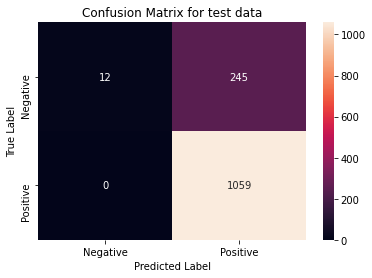

In [10]:
print("Multinomial Naive Bayes Acuracy:", accuracy_score(y_test, predicted)*100)

conf_mat = confusion_matrix(y_test, predicted)
class_label = ["Negative","Positive"]
test =pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(test, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()